In [4]:
import csv
import psycopg2
from pandas import DataFrame
import scipy.optimize
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(user="ukvuowsb", password="xOy8nq3xddLpXCYoioU2q1r9O_0iFkkt", host="tai.db.elephantsql.com",port="5432",database="ukvuowsb")
cur = conn.cursor()

price_material = {"cells":[],"eva":[], "bus_ribbon":[], "frame":[], "glass":[], "inverter":[], "junction_box":[], "tabbing_ribbon":[], "tedlar":[]}
#Cells data
cur.execute("Select price_per_unit, quote_quantity_unit from finance.quote_cells") # where cell_type = 'Poly B'
price_material["cells"].append(DataFrame(cur.fetchall()))
#EVA data
cur.execute("Select price_per_sqm, quote_quantity_unit from finance.quote_eva") # where thickness  = 
price_material["eva"].append(DataFrame(cur.fetchall()))
#Bus Ribbon data
cur.execute("Select price_per_kg, quote_quantity_unit from finance.quote_bus_ribbon")
price_material["bus_ribbon"].append(DataFrame(cur.fetchall()))
#Frame data
cur.execute("Select price_per_metre, quote_quantity_unit from finance.quote_frame")
price_material["frame"].append(DataFrame(cur.fetchall()))
#Glass data
cur.execute("Select price_per_sqm, quote_quantity_unit from finance.quote_glass")
price_material["glass"].append(DataFrame(cur.fetchall()))
#Inverter data
cur.execute("Select price_per_unit, quote_quantity_unit from finance.quote_inverter")
price_material["inverter"].append(DataFrame(cur.fetchall()))
#Junction_box data
cur.execute("Select price_per_set, quote_quantity_unit from finance.quote_junction_box")
price_material["junction_box"].append(DataFrame(cur.fetchall()))
#tabbing_ribbon
cur.execute("Select price_per_kg, quote_quantity_unit from finance.quote_tabbing_ribbon")
price_material["tabbing_ribbon"].append(DataFrame(cur.fetchall()))

In [1]:
import csv
import psycopg2
from pandas import DataFrame
import scipy.optimize
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(user="ukvuowsb", password="xOy8nq3xddLpXCYoioU2q1r9O_0iFkkt", host="tai.db.elephantsql.com",port="5432",database="ukvuowsb")
cur = conn.cursor()

price_material = {
    "cells":[],
    "eva":[],
    "bus_ribbon":[],
    "frame":[],
    "glass":[],
    "inverter":[],
    "junction_box":[],
    "tabbing_ribbon":[],
    "tedlar":[]}

for key in price_material:
    cur.execute("Select price, quote_quantity_unit from finance.quote_{}".format(key)) # where cell_type = 'Poly B'
    price_material[key].append(DataFrame(cur.fetchall()))



UndefinedColumn: column "price" does not exist
LINE 1: Select price, quote_quantity_unit from finance.quote_cells
               ^


In [5]:
#Cost fit function (exp decay)
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

In [6]:
panel = {
    "cells": 60,
    "eva": 3.2,
    "bus_ribbon":0.041,
    "frame":1,
    "glass":1.6,
    "inverter":0.246,
    "junction_box":1,
    "tabbing_ribbon":0.198,
    "tedlar":1.6
}

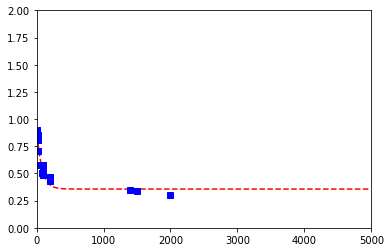

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [7]:
paramaters = {
    "cells":[],
    "eva":[],
    "bus_ribbon":[],
    "frame":[],
    "glass":[],
    "inverter":[],
    "junction_box":[],
    "tabbing_ribbon":[],
    "tedlar":[]}

k = np.arange(10, 5000, 10) #plot range
for material in price_material:
    x = price_material[material][0].iloc[:,1]
    y = price_material[material][0].iloc[:,0]
    p0 = (1, .1, 0.5) # start with values near those we expect
    params, cv = scipy.optimize.curve_fit(monoExp, x, y, p0)
    paramaters[material].append(params)
    plt.figure()
    plt.plot(k, paramaters[material][0][0] * np.exp(-paramaters[material][0][1] * k) + paramaters[material][0][2], 'r--',x,y, 'bs')
    plt.axis([0, 5000, 0, 2])
    plt.show()

In [8]:
quantity_panels = 0

In [9]:
price_panel = 0
for material in panel:
    price_panel += panel[material]* (paramaters[material][0][0] * np.exp(-paramaters[material][0][1] * quantity_panels) + paramaters[material][0][2])
print(price_panel)

IndexError: list index out of range

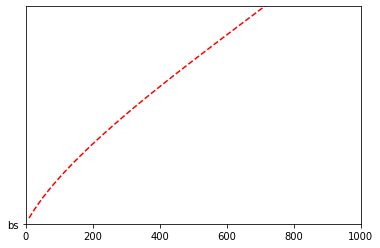

In [7]:
k = np.arange(10, 1000, 10) #plot range
funcCells = paramaters["cells"][0][0] * np.exp(-paramaters["cells"][0][1] * k) + paramaters["cells"][0][2]
funcEva = paramaters["eva"][0][0] * np.exp(-paramaters["eva"][0][1] * k) + paramaters["eva"][0][2]
plt.figure()
plt.plot(k, (funcCells + funcEva)*k, 'r--','bs')
plt.axis([0, 1000, 0, 1000])
plt.show()

In [1]:
a = 0

In [2]:
a + 1

1